# INTRODUCTION

### Purpose

To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.

### Dataset
This dataset is created for prediction of graduate admissions and the dataset link is below:

https://www.kaggle.com/mohansacharya/graduate-admissions

Features in the dataset:

* GRE Scores (290 to 340)
* TOEFL Scores (92 to 120)
* University Rating (1 to 5)
* Statement of Purpose (1 to 5)
* Letter of Recommendation Strength (1 to 5)
* Undergraduate CGPA (6.8 to 9.92)
* Research Experience (0 or 1)
* Chance of Admit (0.34 to 0.97)

### Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

#### Importing Libraries and Reading the Dataset

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import numpy as np
import seaborn as sns
%matplotlib inline
import sys
import os

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv', sep=',')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### df.info():

* Used to find total number of columns and rows
* Show data types
* Memory usage i.e. 35.2 KB

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


### Finding correlation between columns

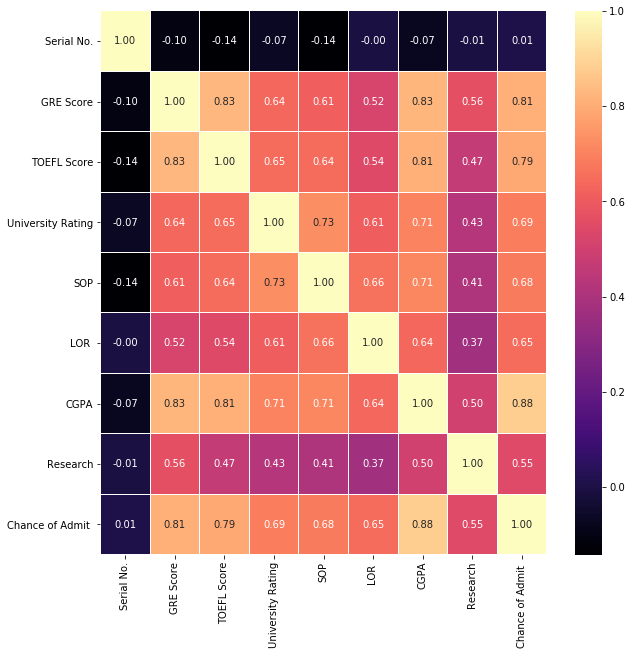

In [6]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

From the above daigram, we can see that GRE score, TOFEL score and CGPA are highly correlated to Chance of Admit (target variable). While SOP, LOR and Research are less correlated.

### Data Exploration

Since GRE score, TOFEL score and CGPA are highly correlated variables, lets find more in detail about these variables with respect to Chance of Admit.

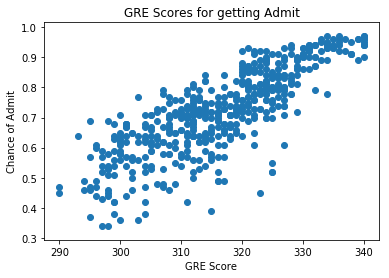

In [10]:
plt.scatter(df['GRE Score'],df["Chance of Admit "])
plt.title("GRE Scores for getting Admit")
plt.ylabel("Chance of Admit")
plt.xlabel("GRE Score")
plt.show()

* Chances of getting Admit are high for GRE score above 325.

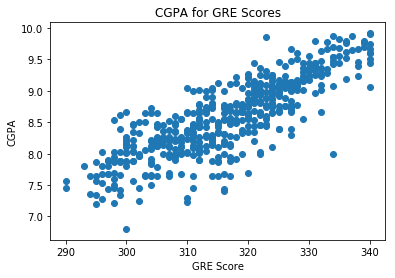

In [11]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

* Candidates with high GRE scores usually have a high CGPA score.

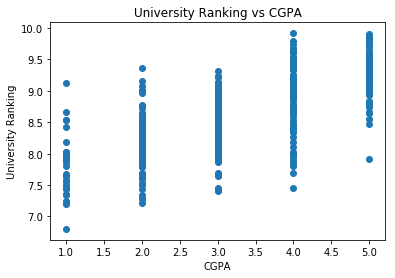

In [135]:
plt.scatter(df["University Rating"],df['CGPA'])
plt.title("University Ranking vs CGPA")
plt.ylabel("University Ranking")
plt.xlabel("CGPA")
plt.show()

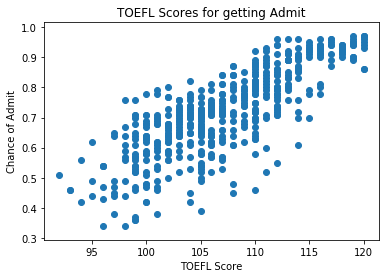

In [16]:
plt.scatter(df['TOEFL Score'],df["Chance of Admit "])
plt.title("TOEFL Scores for getting Admit")
plt.ylabel("Chance of Admit")
plt.xlabel("TOEFL Score")
plt.show()

* Chances of getting Admit are high for TOEFL score > 110.

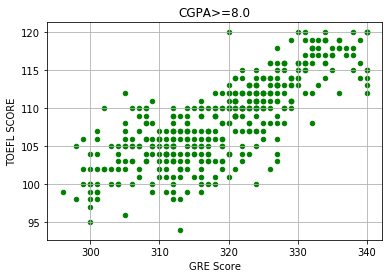

In [18]:
df[df.CGPA >= 8.0].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="green")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.0")
plt.grid(True)
plt.show()

* Candidates who score good GRE and TOEFL scores end up getting good CGPA score and are fortunate to get admissions in top universities.

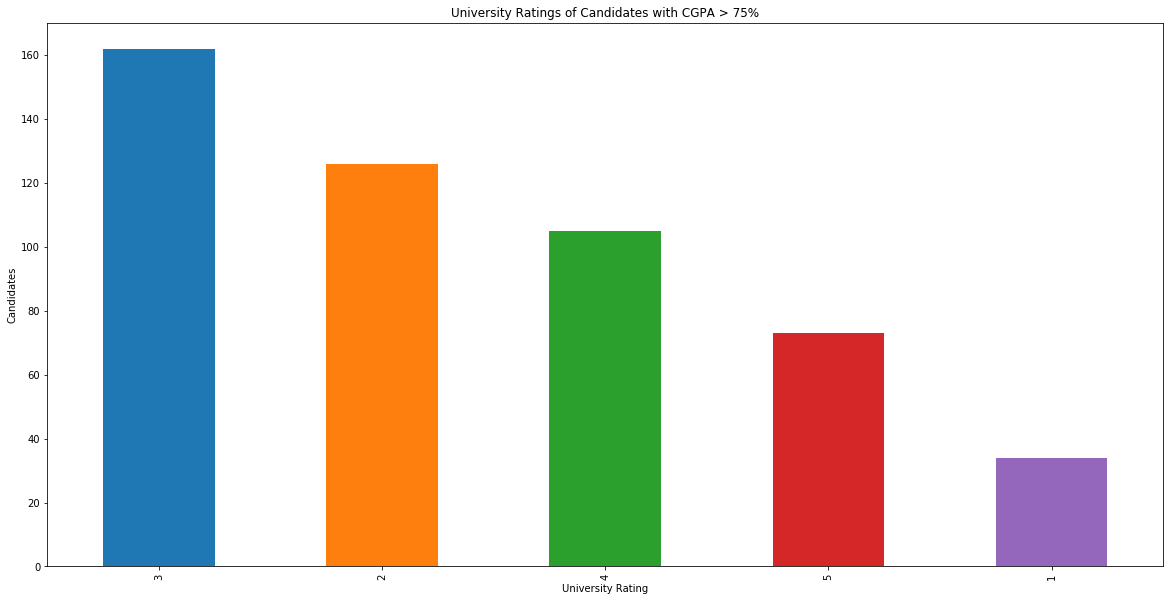

In [53]:
s = df[df["CGPA"] >= 0.75]["University Rating"].value_counts()
plt.title("University Ratings of Candidates with CGPA > 75%")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

* Candidates with good CGPA scores get admissions into top universities

### Supervised Machine Learning Algorithms

## 1. Linear Regression

For performing regression we need to remove unwanted columns from the data. For example, Serial no  stores index values and is not correlated to the target variale hence it needs to be removed.

In [54]:
df.drop(["Serial No."],axis=1,inplace = True)

In [55]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.


Let’s first plot the distribution of the target variable "Chance of Admit". We will use the distplot function from the seaborn library.

C:\Users\nikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nikhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


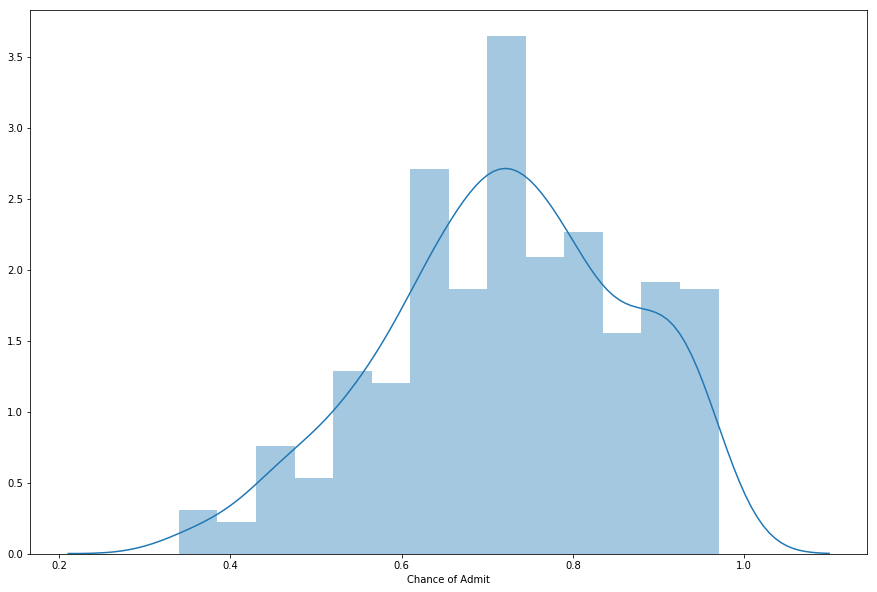

In [60]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Chance of Admit'])

* We see that the values of Chance of Admit are distributed normally with few outliers.

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

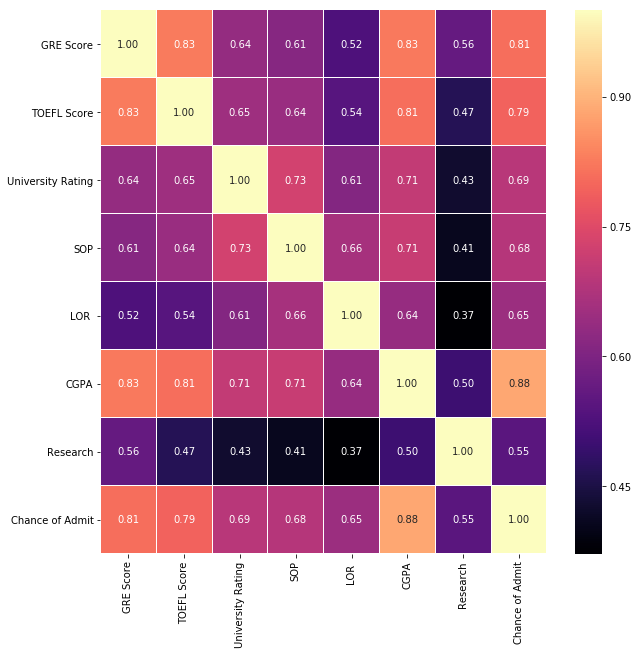

In [61]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

#### Observations

* To fit a linear regression model, we select those features which have a high correlation with our target variable Chance of Admit. By looking at the correlation matrix we can see that GRE Score, TOEFL and CGPA has a strong positive correlation with Chance of Admit (0.81, 0.79, 0.88).

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [57]:
y = df["Chance of Admit"].values
X = df.drop(["Chance of Admit"],axis=1)

x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

#### Normalising

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [63]:
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

#### Training and testing the model



After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data. We use scikit-learn’s ****LinearRegression**** to train our model on both the training and test sets.

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [76]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data.head()

,Actual,Predicted
0,0.93,0.914575
1,0.84,0.795181
2,0.39,0.572660
3,0.77,0.707370
4,0.74,0.815883


We can also visualize comparison result as a bar graph using the below script :

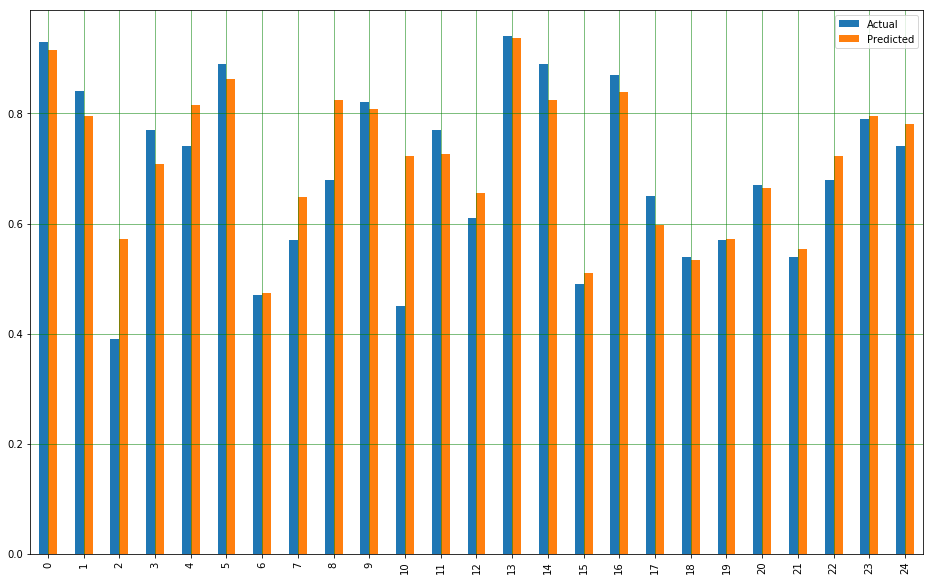

In [77]:
df1 = data.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [78]:
r2 = r2_score(y_test, y_pred)
print("r_square score", r2)

r_square score 0.818843256782963


## 2. Random Forest Regression

A ***random forest*** is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [79]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

In [80]:
print("r_square score: ", r2_score(y_test,y_pred))

r_square score:  0.7907314767726159


# Classification Algorithms

For classification lets assume, If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

In [112]:
y_train_cl = [1 if each > 0.8 else 0 for each in y_train]
y_test_cl  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_cl = np.array(y_train_cl)
y_test_cl = np.array(y_test_cl)

## 1. Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train_cl)
print("Model score: ", model.score(x_test,y_test_cl))

Model score:  0.96


In [119]:
confusion_matrix(y_test_cl,model.predict(x_test))

array([[72,  1],
       [ 3, 24]], dtype=int64)

In [121]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_cl,model.predict(x_test)))
print("recall_score: ", recall_score(y_test_cl,model.predict(x_test)))


precision_score:  0.96
recall_score:  0.8888888888888888


## 2. Support Vector Machine

In [122]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train_cl)
print("Model score: ", svm.score(x_test,y_test_cl))

Model score:  0.97


In [124]:
confusion_matrix(y_test_cl,svm.predict(x_test))

array([[72,  1],
       [ 2, 25]], dtype=int64)

In [125]:
print("precision_score: ", precision_score(y_test_cl,svm.predict(x_test)))
print("recall_score: ", recall_score(y_test_cl,svm.predict(x_test)))


precision_score:  0.9615384615384616
recall_score:  0.9259259259259259


## 3. Gaussian Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train_cl)
print("Model score: ", nb.score(x_test,y_test_cl))

Model score:  0.93


In [130]:
confusion_matrix(y_test_cl,nb.predict(x_test))

array([[66,  7],
       [ 0, 27]], dtype=int64)

In [131]:
print("precision_score: ", precision_score(y_test_cl,nb.predict(x_test)))
print("recall_score: ", recall_score(y_test_cl,nb.predict(x_test)))


precision_score:  0.7941176470588235
recall_score:  1.0


## 4. Decission Tree Classification


In [132]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_cl)
print("Model score: ", dtc.score(x_test,y_test_cl))

Model score:  0.95


In [133]:
confusion_matrix(y_test_cl,dtc.predict(x_test))

array([[69,  4],
       [ 1, 26]], dtype=int64)

In [134]:
print("precision_score: ", precision_score(y_test_cl,dtc.predict(x_test)))
print("recall_score: ", recall_score(y_test_cl,dtc.predict(x_test)))

precision_score:  0.8666666666666667
recall_score:  0.9629629629629629
